# CASE STUDY 3 - CORRELATION AND REGRESSION

> Done by Jose Johnylal

----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sale = pd.read_csv('Add_sales_data_2018.csv')

In [3]:
sale.head(10)

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,4404.686
6,2018-09-27,234.55,236.80,231.10,233.80,233.25,4418.709
7,2018-09-26,240.00,240.00,232.50,235.00,234.25,4470.775
8,2018-09-25,233.30,236.75,232.00,236.25,236.10,4425.005
9,2018-09-24,233.55,239.20,230.75,234.00,233.30,4446.441


In [4]:
sale.shape

(205, 7)

In [15]:
sale.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

### Correlation between expenses incurred for the advertising companies and profit.

<AxesSubplot:>

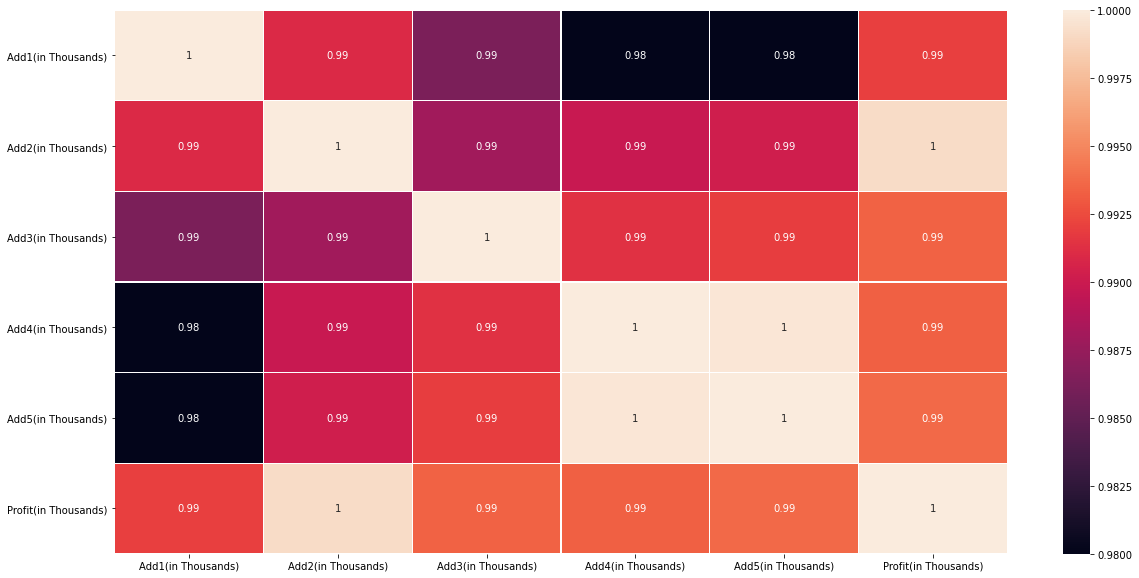

In [6]:
cm = sale.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(cm, vmin=0.98, vmax=1, annot=True, linewidth=0.2)

**Inference:**
* There is a strong positive correlation between the expense for each advertising company and the profit generated.


### Regression model to predict the profit


In [7]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [8]:
y = sale['Profit(in Thousands)']
X = sale.drop(['Date', 'Profit(in Thousands)'], axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [11]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [12]:
predictions

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788, 5038.222,
       5491.792, 5019.997, 4647.356, 4486.38 , 4435.174, 5300.437,
       5425.19 , 4482.183, 4193.095, 6062.457])

In [13]:
print('Mean squared error is ', mean_squared_error(y_test, predictions))

Mean squared error is  6.999220567756388e-25


**Inference:**
* The mean squared error is very low which indicates that the predictions are very close to the actual data and hence the model generates highly accurate predictions.


### Prediction of profit for a given set of amounts for each advertising company



In [17]:
ar = np.array([290.0, 312.0, 309.0, 298.0, 320.0])
ar = ar.reshape(1,-1) 
v = model.predict(ar)
v

array([5820.06])

The company wants to spend the following amounts for advertising:
  *  Add1 -  290,000
  *  Add2 -  312,000
  *  Add3 -  309,000
  *  Add4 -  298,000
  *  Add5 -  320,000
    
> Using the regression model it is predicted that the textile company will generate a profit of **5,820,060**.